# Abstract

An acoustic wave is a continuous signal. Sampled at a certain rate it becomes a discrete series, a timeseries. And just like a time series, an acustic wave has or doesn't have patterns. And where there are patterns, we have a great pattern feature extractor: a Convolutional Neural Network (CNN). We'll be using the feature extraction capabilities of the CNN to extract the patterns from a sound wave and to map the features of that sound wave to the command/label class they belong to. The process is anologous with extracting features from a picture and then assigning the picture to the class cat, dog, mule, bird, cow.

We'll be using the dataset TensorFlow Speech Commands Dataset which can be found here: http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

We'll be using LibROSA package to process the audio signals: conda install -c conda-forge librosa

We'll be training a one dimensional CNN on the training and validation sets then we'll be using the testing set to make predictions and to assess the performance of the model

### Import the libraries and turn off the warnings

In [1]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

### Declare the audio path

In [3]:
audio_path = 'C:/Users/dmcul/Downloads/SpeechCommands/'
os.listdir(audio_path)

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

### Load the audio waves 

In [ ]:
samples, sample_rate = librosa.load(audio_path + 'sheila/2c7c33e8_nohash_0.wav', sr = 16000)

### Visualize the audio wave

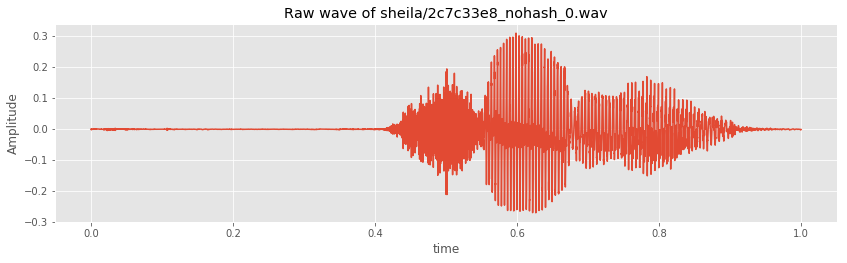

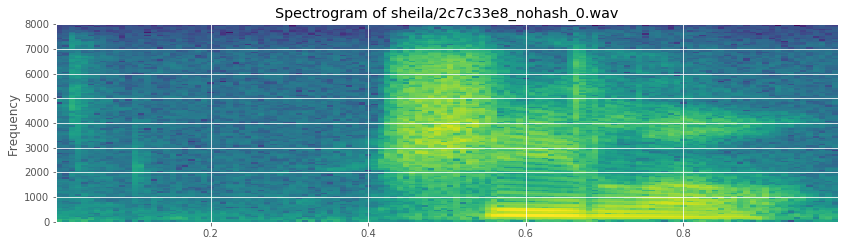

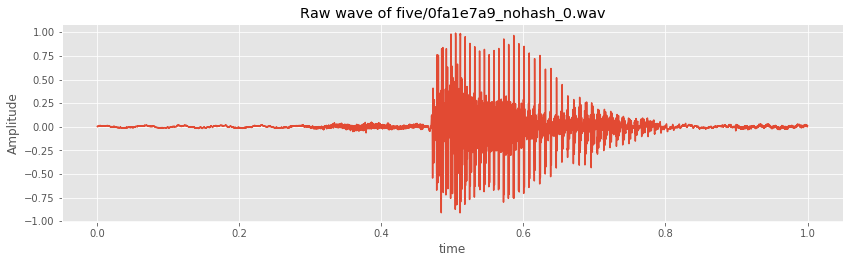

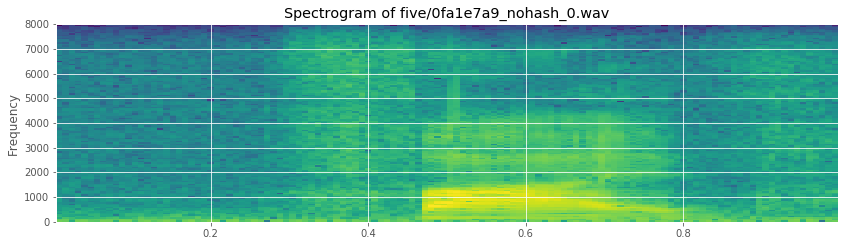

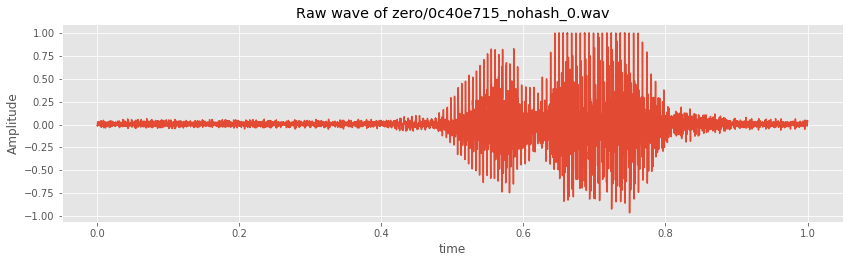

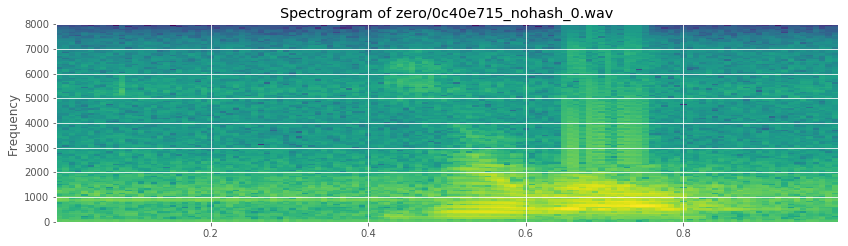

In [4]:
# plot the line plot and the spectrogram of the audio wave

fig = plt.figure(figsize=(14, 8))
ipd.Audio(samples, rate=sample_rate)
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'sheila/2c7c33e8_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Spectrogram of ' + 'sheila/2c7c33e8_nohash_0.wav')
plt.specgram(samples,Fs=sample_rate) 
ax1.set_ylabel('Frequency')
plt.show()

samples, sample_rate = librosa.load(audio_path + 'five/0fa1e7a9_nohash_0.wav', sr = 16000)

fig = plt.figure(figsize=(14, 8))
ipd.Audio(samples, rate=sample_rate)
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'five/0fa1e7a9_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Spectrogram of ' + 'five/0fa1e7a9_nohash_0.wav')
plt.specgram(samples,Fs=sample_rate) 
ax1.set_ylabel('Frequency')
plt.show()

samples, sample_rate = librosa.load(audio_path + 'zero/0c40e715_nohash_0.wav', sr = 16000)

fig = plt.figure(figsize=(14, 8))
ipd.Audio(samples, rate=sample_rate)
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'zero/0c40e715_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Spectrogram of ' + 'zero/0c40e715_nohash_0.wav')
plt.specgram(samples,Fs=sample_rate) 
ax1.set_ylabel('Frequency')
plt.show()

In [5]:
ipd.Audio(samples, rate=sample_rate)

print(sample_rate)

16000


In [6]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

Now, let’s plot the number of recordings for each voice command:

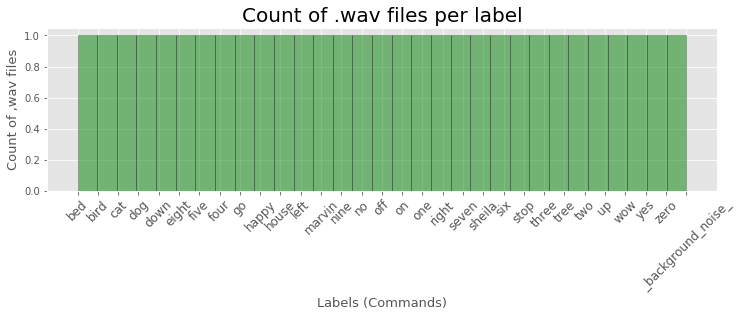

In [43]:
labels=os.listdir(audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
cnt_recordings = []

for label in labels:
    waves = [f for f in os.listdir(audio_path + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    cnt_recordings.append(label)
    
#plot
plt.figure(figsize=(12,3))
plt.hist(cnt_recordings, alpha=.5, edgecolor='k', color = 'g', bins=len(labels))
plt.xlabel('Labels (Commands)', fontsize=13)
plt.ylabel('Count of ,wav files', fontsize=13)
plt.xticks(labels, fontsize=12, rotation=45)
plt.title('Count of .wav files per label', fontsize=20)
plt.show()

In [7]:
labels=[
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
]

### Length of recordings

The distribution of each recording's length

Text(0.5, 1.0, 'Recording time in seconds')

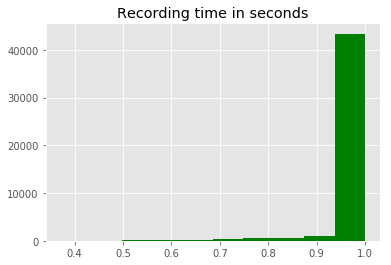

In [31]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(audio_path + label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings), color ='g')
plt.title('Recording time in seconds')

We notice from the histogramgs that most of the recordings are in the one second length bucket. What about the shorter recordings? Let's see what category of labels they belong to.

In [44]:
# get the count of each label type
reg_labels = []
short_labels = []

for label in labels: # for each sound category
    waves = [f for f in os.listdir(audio_path + label) if f.endswith('.wav')] # each wav file
    for wav in waves:
        sample_rate, samples = wavfile.read(audio_path + label + '/' + wav)
        if float(len(samples)/sample_rate) < 1:
            short_labels.append(label)
        else:
            reg_labels.append(label)
           
s_labels = np.unique(short_labels)
r_labels = np.unique(reg_labels)

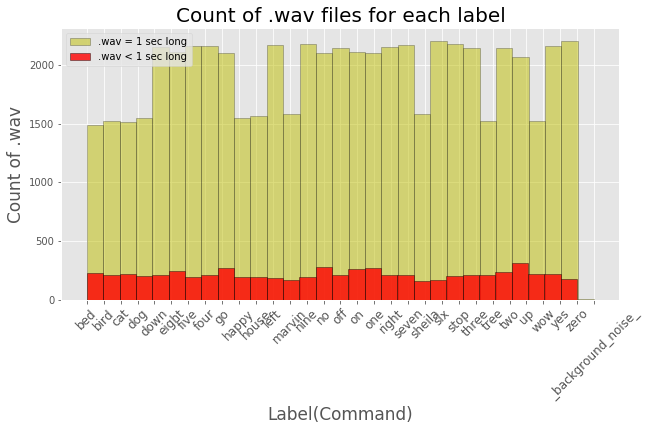

In [46]:
# plot all label distribution regardless of length
plt.figure(figsize=(10,5))

plt.hist(reg_labels, alpha=.5, edgecolor='k', color = 'y', label=".wav = 1 sec long", bins = len(r_labels))
plt.hist(short_labels, alpha=.8, edgecolor='k', color = 'r', label=".wav < 1 sec long", bins = len(s_labels))
plt.xlabel('Label(Command)', fontsize=17)
plt.ylabel('Count of .wav', fontsize=17)
plt.xticks(r_labels, fontsize=12, rotation=45)
plt.title('Count of .wav files for each label', fontsize=20)
plt.legend()
plt.show()

### Noise

The short soundclips represent the same labels (commands) as the regular ones. Given their small proportion relative to the regular soundclips, it can be inferred they represent outliers - non-representative data points. We will exclude them to prevent training on non-representative data points

### Preprocessing the audio waves
In the data exploration part earlier, we have seen that the duration of a few recordings is less than 1 second and the sampling rate is too high. So, let us read the audio waves and use the below-preprocessing steps to deal with this.
Here are the two steps we’ll follow:

### Resampling
While resampling, we will be removing the shorter soundclips because they are just noise

In [13]:
# lower the resolution of the sound to save processing time
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(audio_path + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : # we're selecting only those samples with the sample length equal to the sample rate, i.e. 1sec
            all_wave.append(samples)
            all_label.append(label)

eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two


Convert the output labels to dummies:

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

Now, convert the integer encoded labels to a one-hot vector since it's a multi-classification problem:

In [15]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [16]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

Split into training, validation and testing set
Next, we will train the model on 60% of the data and validate on the remaining 20%:

In [17]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.4,random_state=42,shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=42,shuffle=True)

### Neural Architecture
We'll bel using Conv1d - a one dimensional convolutional neural network because our data has only one dimension - the amplitude values along a discrete time interval

The dense layers are regularized with a dropout rate of 30%

In the output layer we're making use of softmax activation function since we're dealing with a multi labe classification problen

### Model building

In [25]:
warnings.filterwarnings("ignore")

from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0         
__________

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [26]:
warnings.filterwarnings("ignore")

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch:

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

We'll train the model on a batch size of 32 and evaluate the performance on the validation set:

In [28]:
warnings.filterwarnings("ignore")

history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 25251 samples, validate on 8418 samples
Epoch 1/100
25251/25251 [==============================] - 104s 4ms/step - loss: 2.6913 - acc: 0.1348 - val_loss: 2.2072 - val_acc: 0.2817

Epoch 00001: val_acc improved from -inf to 0.28166, saving model to best_model.hdf5
Epoch 2/100
25251/25251 [==============================] - 101s 4ms/step - loss: 2.0232 - acc: 0.3278 - val_loss: 1.7962 - val_acc: 0.4310

Epoch 00002: val_acc improved from 0.28166 to 0.43098, saving model to best_model.hdf5
Epoch 3/100
25251/25251 [==============================] - 100s 4ms/step - loss: 1.6899 - acc: 0.4365 - val_loss: 1.4528 - val_acc: 0.5342

Epoch 00003: val_acc improved from 0.43098 to 0.53421, saving model to best_model.hdf5
Epoch 4/100
25251/25251 [==============================] - 100s 4ms/step - loss: 1.4727 - acc: 0.5136 - val_loss: 1.3430 - val_acc: 0.5905

Epoch 00004: val_acc improved from 0.53

25251/25251 [==============================] - 91s 4ms/step - loss: 0.4641 - acc: 0.8493 - val_loss: 0.5564 - val_acc: 0.8317

Epoch 00038: val_acc improved from 0.83036 to 0.83167, saving model to best_model.hdf5
Epoch 39/100
25251/25251 [==============================] - 91s 4ms/step - loss: 0.4698 - acc: 0.8498 - val_loss: 0.5661 - val_acc: 0.8335

Epoch 00039: val_acc improved from 0.83167 to 0.83345, saving model to best_model.hdf5
Epoch 40/100
25251/25251 [==============================] - 91s 4ms/step - loss: 0.4511 - acc: 0.8568 - val_loss: 0.5460 - val_acc: 0.8370

Epoch 00040: val_acc improved from 0.83345 to 0.83702, saving model to best_model.hdf5
Epoch 41/100
25251/25251 [==============================] - 91s 4ms/step - loss: 0.4542 - acc: 0.8555 - val_loss: 0.5713 - val_acc: 0.8295

Epoch 00041: val_acc did not improve from 0.83702
Epoch 42/100
25251/25251 [==============================] - 91s 4ms/step - loss: 0.4514 - acc: 0.8547 - val_loss: 0.5771 - val_acc: 0.8272

Ep

### Plotting performance

Plot the training and validation loss by epoch

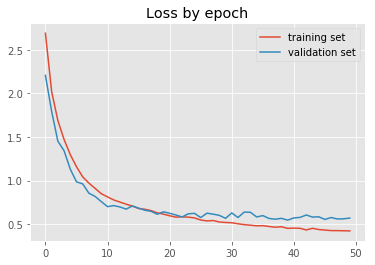

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
plt.legend()
plt.title('Loss by epoch')
plt.show()

### Loading the best model

In [114]:
from keras.models import load_model
model=load_model('best_model.hdf5')

Define the function that predicts text for the given audio:

### Prediction labels

In [130]:
y_pred = []
for _,i in enumerate(x_test):
    prob = model.predict(i.reshape(1,8000,1))
    y_pred.append(prob)

In [132]:
y_pred = np.array(y_pred).reshape(-1, 21)

(8417, 21)

### Import the metrics libraries

In [133]:
# For metrics
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

fpr = {}
tpr = {}
roc_auc = {}
for i in range(21):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

### Visualize

ROC curve of class 0 (area = 0.99)
ROC curve of class 1 (area = 0.99)
ROC curve of class 2 (area = 0.99)
ROC curve of class 3 (area = 0.98)
ROC curve of class 4 (area = 1.00)
ROC curve of class 5 (area = 1.00)
ROC curve of class 6 (area = 0.99)
ROC curve of class 7 (area = 0.99)
ROC curve of class 8 (area = 0.99)
ROC curve of class 9 (area = 0.99)
ROC curve of class 10 (area = 0.99)
ROC curve of class 11 (area = 0.98)
ROC curve of class 12 (area = 0.99)
ROC curve of class 13 (area = 0.99)
ROC curve of class 14 (area = 0.99)
ROC curve of class 15 (area = 1.00)
ROC curve of class 16 (area = 0.99)
ROC curve of class 17 (area = 0.99)
ROC curve of class 18 (area = 0.99)
ROC curve of class 19 (area = 0.99)
ROC curve of class 20 (area = 0.99)


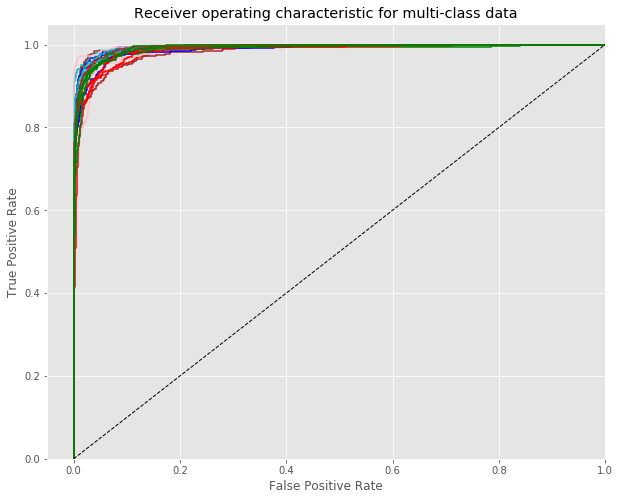

Overall AUC score:0.991


In [134]:
plt.figure(figsize=(10,8))

colors = ['blue', 'red', 'green', 'pink', 'c', 'brown','blue', 'red', 'green', 'pink', 'c', 'brown','blue', 'red', 'green', 'pink', 'c', 'brown','red', 'green', 'green']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color)#, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    print('ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
#plt.legend(loc="lower right")
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('Overall AUC score:%.3f'%auc)

# Conclusion

In this project we introduced a way to transform sound bits in a way that lends itself to a multi-classification  problem. We implemented the solution by building a one dimensional CNN which we tested and scored using a ROC for multi-class data